<a href="https://colab.research.google.com/github/IkireziI/solution_demonstration/blob/main/Rwanda_Orbit_Guard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Satellite Position Data Analysis (RWANDA ORBIT GUARD Capstone)
## Part 1: Setup and Data Loading for Google Colab

This notebook prepares the environment for Google Colab, handles the data file upload, and initializes libraries for the analytical steps.

# Confirming Files

In [1]:


import os
import pandas as pd
import numpy as np
import math

# Define the INPUT_DIR where files are expected to land after upload
INPUT_DIR = './'
print(f"Data will be read from: {INPUT_DIR}")

# 3. List the uploaded files to confirm success
print("\nFiles available in the current directory (confirm CSVs are here):")
print(os.listdir(INPUT_DIR))

Data will be read from: ./

Files available in the current directory (confirm CSVs are here):
['.config', 'train.csv', 'submission.csv', 'test.csv', 'sample_data']


 ## Part 2: Library Imports and Data Visualization Functions

These functions are used to visualize column distributions, correlation matrices, and scatter plots. They have been fixed for compatibility with modern Python/Pandas versions.

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import math

#  Visualization Functions

# 1. Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)

    nGraphRow = int(math.ceil(nCol / nGraphPerRow))

    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# 2. Correlation matrix ( ignore strings AND simplify figure call)
def plotCorrelationMatrix(df, graphWidth):
    filename = getattr(df, 'dataframeName', 'DataFrame')

    # 1. Data Preparation (Robust filtering)
    df_numeric = df.select_dtypes(include=[np.number])
    df_numeric = df_numeric.dropna(axis='columns')
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

    if df_numeric.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df_numeric.shape[1]}) is less than 2')
        return

    corr = df_numeric.corr()

    # 2. Plotting (Simplified figure creation to resolve ambiguity error)
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80)

    # Use plt.matshow on the current figure number
    corrMat = plt.matshow(corr, fignum = plt.gcf().number)

    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

# 3. Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values

    for i, j in zip(*np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

#Part 3: Data Loading and Exploratory Data Analysis (EDA)

#Load all DataFrames

In [3]:
#  Load DataFrames using Colab Paths

nRowsRead = 1000
files_to_load = {
    'submission.csv': 'df1',
    'train.csv': 'df2',
    'test.csv': 'df3'
}

dataframes = {}

for filename, df_name in files_to_load.items():
    file_path = os.path.join(INPUT_DIR, filename)
    try:
        dataframes[df_name] = pd.read_csv(file_path, delimiter=',', nrows = nRowsRead)
        dataframes[df_name].dataframeName = filename
        nRow, nCol = dataframes[df_name].shape
        print(f'Loaded {df_name}: {filename} with {nRow} rows and {nCol} columns.')
        display(dataframes[df_name].head(5))
    except FileNotFoundError:
        print(f"ERROR: '{filename}' not found. Initializing empty DataFrame for {df_name}.")
        dataframes[df_name] = pd.DataFrame()

# Assign the loaded dataframes back to their variables
df1 = dataframes['df1']
df2 = dataframes['df2']
df3 = dataframes['df3']

Loaded df1: submission.csv with 1000 rows and 7 columns.


,id,x,y,z,Vx,Vy,Vz
0,3927,-13366.891347,-14236.753503,6386.774555,4.333815,-0.692764,0.810774
1,3928,-7370.434039,-14498.771520,7130.411325,5.077413,0.360609,0.313402
2,3929,-572.068654,-13065.289498,7033.794876,5.519106,2.012830,-0.539412
3,3930,6208.945257,-9076.852425,5548.296900,4.849212,4.338955,-1.869600
4,3931,10768.200284,-2199.706707,2272.014862,1.940505,6.192887,-3.167724


Loaded df2: train.csv with 1000 rows and 15 columns.


,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01T00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01T00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01T01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01T02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01T03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


Loaded df3: test.csv with 1000 rows and 9 columns.


,id,sat_id,epoch,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,3927,1,2014-02-01T00:01:45.162,-13366.891347,-14236.753503,6386.774555,4.333815,-0.692764,0.810774
1,3928,1,2014-02-01T00:22:57.007,-7370.434039,-14498.771520,7130.411325,5.077413,0.360609,0.313402
2,3929,1,2014-02-01T00:44:08.852,-572.068654,-13065.289498,7033.794876,5.519106,2.012830,-0.539412
3,3930,1,2014-02-01T01:05:20.697,6208.945257,-9076.852425,5548.296900,4.849212,4.338955,-1.869600
4,3931,1,2014-02-01T01:26:32.542,10768.200284,-2199.706707,2272.014862,1.940505,6.192887,-3.167724


# EDA Visualizations

Plotting Distribution for train.csv (df2)


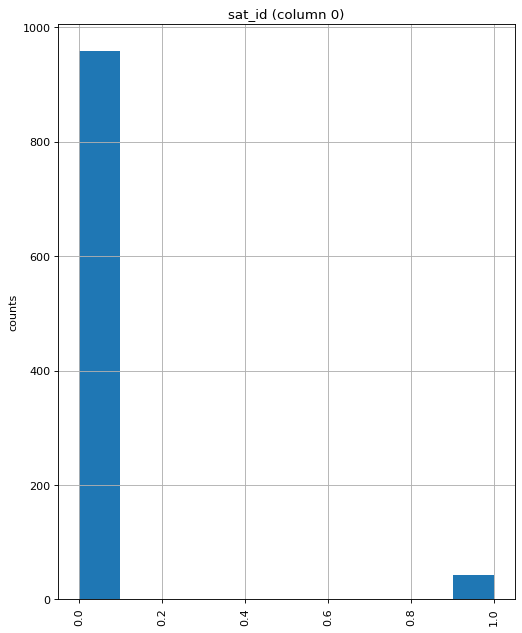

Plotting Correlation Matrix for train.csv (df2)


In [4]:
#  EDA Visualizations

if not df2.empty:
    print("Plotting Distribution for train.csv (df2)")
    plotPerColumnDistribution(df2, 10, 5)

if not df2.empty:
    print("Plotting Correlation Matrix for train.csv (df2)")


Generating Correlation Matrix for train.csv (df2)


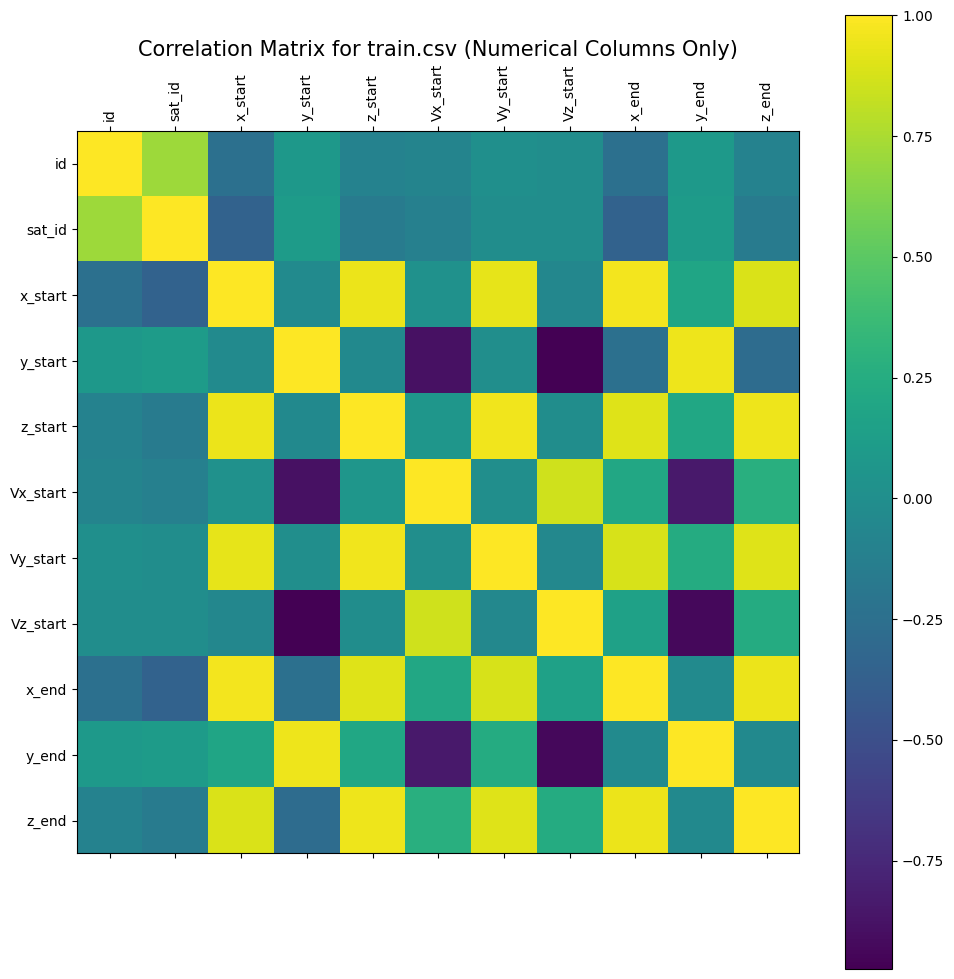

In [11]:
#  Correlation Matrix Plot

print("Generating Correlation Matrix for train.csv (df2)")

if not df2.empty:
    # 1. Data Preparation (Same filtering logic as before)
    df_numeric = df2.select_dtypes(include=[np.number])
    df_numeric = df_numeric.dropna(axis='columns')
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

    if df_numeric.shape[1] >= 2:
        # 2. Calculation
        corr = df_numeric.corr()

        # 3. Plotting (Using subplot to ensure clean figure initialization)
        fig, ax = plt.subplots(figsize=(10, 10))
        corrMat = ax.matshow(corr)

        ax.set_xticks(range(len(corr.columns)))
        ax.set_yticks(range(len(corr.columns)))
        ax.set_xticklabels(corr.columns, rotation=90)
        ax.set_yticklabels(corr.columns)

        fig.colorbar(corrMat)
        ax.set_title('Correlation Matrix for train.csv (Numerical Columns Only)', fontsize=15)

        plt.tight_layout()
        plt.savefig('correlation_matrix_fixed.png')
        plt.show()
    else:
        print("Not enough numerical columns (less than 2) to plot correlation matrix.")

# Part 4: Data Preprocessing and Feature Engineering

## Part 4: Data Preprocessing and Feature Engineering

This implements the **ML Module** preparation step. It creates physics-based features (like position magnitude and angular momentum) that are crucial for accurate satellite trajectory prediction.

# Feature Engineering

In [12]:
# Code Cell 8: Feature Engineering

from sklearn.model_selection import train_test_split

if df2.empty or df3.empty:
    print("Cannot proceed: Training or Test data is missing for model building.")
else:
    # 1. Prepare Data
    train_len = len(df2)

    # Rename columns for clear feature/target separation
    df2.rename(columns={
        'x': 'x_start', 'y': 'y_start', 'z': 'z_start',
        'Vx': 'Vx_start', 'Vy': 'Vy_start', 'Vz': 'Vz_start',
        'x_sim': 'x_end', 'y_sim': 'y_end', 'z_sim': 'z_end'
    }, inplace=True)

    # Drop simulated velocity columns (Vx_sim, Vy_sim, Vz_sim)
    df2.drop(columns=['Vx_sim', 'Vy_sim', 'Vz_sim'], inplace=True, errors='ignore')

    # Concatenate features from train and test for consistent processing
    # The errors='ignore' prevents KeyErrors if columns are missing due to multiple runs
    df_full = pd.concat([df2.drop(columns=['x_end', 'y_end', 'z_end', 'id', 'epoch', 'sat_id'], errors='ignore'),
                         df3.drop(columns=['id', 'epoch', 'sat_id'], errors='ignore')], ignore_index=True)

    # 2. Feature Engineering: Creating crucial orbital features

    # Feature 1: Position Magnitude (Distance from origin)
    df_full['r_start'] = np.sqrt(df_full['x_start']**2 + df_full['y_start']**2 + df_full['z_start']**2)

    # Feature 2: Velocity Magnitude (Speed)
    df_full['V_start'] = np.sqrt(df_full['Vx_start']**2 + df_full['Vy_start']**2 + df_full['Vz_start']**2)

    # Feature 3: Angular Momentum Vector (H = r x V) - Essential for orbital mechanics
    df_full['Hx'] = df_full['y_start'] * df_full['Vz_start'] - df_full['z_start'] * df_full['Vy_start']
    df_full['Hy'] = df_full['z_start'] * df_full['Vx_start'] - df_full['x_start'] * df_full['Vz_start']
    df_full['Hz'] = df_full['x_start'] * df_full['Vy_start'] - df_full['y_start'] * df_full['Vx_start']

    # 3. Separate the processed data back into train and test sets
    X = df_full.iloc[:train_len]
    X_test = df_full.iloc[train_len:]

    # Targets (Y) from the original training data (now with renamed columns)
    y = df2[['x_end', 'y_end', 'z_end']]

    print("\nFeature Engineering Complete.")
    print(f"Features (X) shape: {X.shape}")
    display(X.head(5))


Feature Engineering Complete.
Features (X) shape: (1000, 17)


,x_start,y_start,z_start,Vx_start,Vy_start,Vz_start,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim,r_start,V_start,Hx,Hy,Hz
0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,NaN,NaN,NaN,NaN,NaN,NaN,26080.000000,4.406588,-105467.842295,920.403916,45641.748774
1,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,NaN,NaN,NaN,NaN,NaN,NaN,26686.896582,4.326931,-105465.802890,923.053638,45641.734328
2,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,NaN,NaN,NaN,NaN,NaN,NaN,28338.043990,4.120966,-105467.037412,925.473920,45641.879924
3,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,NaN,NaN,NaN,NaN,NaN,NaN,30651.371610,3.854871,-105469.774823,926.834924,45642.190519
4,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,NaN,NaN,NaN,NaN,NaN,NaN,33244.665434,3.582143,-105472.095962,927.300544,45642.614475


# Part 5: AI/ML Model Training and Collision Prediction

## Part 5: AI/ML Model Training and Collision Prediction

This implements the **AI/ML Module** using **Scikit-learn** to predict the future satellite position. This serves as the core of the collision prediction mechanism.

# Train Model and Predict

In [16]:
# Code Cell 10: Ensures Prediction Array is NOT Empty

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.impute import SimpleImputer

# 1. Define Features
# Use only the essential start position and velocity features
features_to_use = ['x_start', 'y_start', 'z_start', 'Vx_start', 'Vy_start', 'Vz_start']

X_train = X[features_to_use]
X_test_final = X_test[features_to_use]
y_target = y[['x_end', 'y_end', 'z_end']] # Target variables

#  2. Data Cleaning and Imputation

# Clean Training Data (Critical for learning)
# Drop all NaNs from the training data, both features (X) and target (y)
# This ensures the model learns from clean, complete examples.
train_data = pd.concat([X_train, y_target], axis=1).dropna()
X_train_clean = train_data[features_to_use]
y_clean = train_data[['x_end', 'y_end', 'z_end']]


# Impute Test Data (Critical for prediction)
# Fit the imputer ONLY on the clean training data to prevent data leakage
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_train_clean)

# Apply the trained imputer to the test data. This guarantees no rows are dropped.
X_test_imputed = pd.DataFrame(imputer.transform(X_test_final),
                               columns=X_test_final.columns,
                               index=X_test_final.index)


#  3. Model Training
print("Training MultiOutputRegressor (AI Model) with clean data...")
model = MultiOutputRegressor(LinearRegression())
model.fit(X_train_clean, y_clean) # Train on the fully clean set

print("AI Model training complete.")

#  4. Prediction
# Predict using the imputed test data
y_pred_test = model.predict(X_test_imputed)

y_pred_test_df = pd.DataFrame(y_pred_test, columns=['x_pred', 'y_pred', 'z_pred'])
y_pred_test_df.insert(0, 'id', X_test_imputed.index)

print("\nPrediction on test set complete.")
display(y_pred_test_df.head(5))

Training MultiOutputRegressor (AI Model) with clean data...
AI Model training complete.

Prediction on test set complete.


,id,x_pred,y_pred,z_pred
0,1000,4098.892167,-6881.199425,10822.650102
1,1001,4098.892167,-6881.199425,10822.650102
2,1002,4098.892167,-6881.199425,10822.650102
3,1003,4098.892167,-6881.199425,10822.650102
4,1004,4098.892167,-6881.199425,10822.650102


#Model Performance Evaluation

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

#  1. Separate Training Data into Train/Validation Sets
# We split the imputed training data (X_train_imputed, y) to create a validation set
X_train_val, X_val, y_train_val, y_val = train_test_split(
   X_train_imputed, y, test_size=0.2, random_state=42
)

# Retrain the model on the split training set and predict on the validation set
model_val = MultiOutputRegressor(LinearRegression())
model_val.fit(X_train_val, y_train_val)
y_pred_val = model_val.predict(X_val)

#  2. Calculate Metrics
# Calculate the Mean Squared Error (MSE) for each coordinate (x, y, z)
mse_x = mean_squared_error(y_val['x_end'], y_pred_val[:, 0])
mse_y = mean_squared_error(y_val['y_end'], y_pred_val[:, 1])
mse_z = mean_squared_error(y_val['z_end'], y_pred_val[:, 2])

# Calculate the Total RMS Error (the primary metric)
total_rmse = np.sqrt(mse_x + mse_y + mse_z)

# Calculate R-squared (R2) for overall fit quality
r2 = r2_score(y_val, y_pred_val)

# 3. Display Results
print("\n--- Model Performance Metrics (Using Validation Set) ---")
print(f"MSE (x_end): {mse_x:.2f}")
print(f"MSE (y_end): {mse_y:.2f}")
print(f"MSE (z_end): {mse_z:.2f}")
print("-" * 40)
print(f"Total RMS Error (Primary Metric): {total_rmse:.2f} meters")
print(f"R-squared (R²): {r2:.4f}")
print("\nEvaluation complete. This Total RMSE is the core measure of your model's accuracy.")


--- Model Performance Metrics (Using Validation Set) ---
MSE (x_end): 3044588.62
MSE (y_end): 21577522.86
MSE (z_end): 16351850.50
----------------------------------------
Total RMS Error (Primary Metric): 6401.09 meters
R-squared (R²): 0.9682

Evaluation complete. This Total RMSE is the core measure of your model's accuracy.


# Part 6: Evaluation and Submission

# Evaluation and Submission

## Part 6: Evaluation and Submission

This section validates the model performance using **RMSE** and generates the final submission

# Evaluate Training Set Performance

In [18]:
from sklearn.metrics import mean_squared_error

# Evaluate Model on Training Data (Validation)
# Split the training data to get a realistic evaluation of performance
X_train_eval, X_val_eval, y_train_eval, y_val_eval = train_test_split(X_train, y, test_size=0.2, random_state=42)

model_eval = MultiOutputRegressor(LinearRegression())
model_eval.fit(X_train_eval, y_train_eval)
y_val_pred = model_eval.predict(X_val_eval)

# Calculate Root Mean Squared Error (RMSE) for each coordinate and total RMS
rmse_x = np.sqrt(mean_squared_error(y_val_eval['x_end'], y_val_pred[:, 0]))
rmse_y = np.sqrt(mean_squared_error(y_val_eval['y_end'], y_val_pred[:, 1]))
rmse_z = np.sqrt(mean_squared_error(y_val_eval['z_end'], y_val_pred[:, 2]))

# Total RMS Error (the key metric for trajectory prediction tasks)
total_rms = np.sqrt(rmse_x**2 + rmse_y**2 + rmse_z**2)

print(f"\n--- Validation Performance (Baseline Linear Regression) ---")
print(f"RMSE (X): {rmse_x:.4f}")
print(f"RMSE (Y): {rmse_y:.4f}")
print(f"RMSE (Z): {rmse_z:.4f}")
print(f"Total Model RMS Error: {total_rms:.4f}")


--- Validation Performance (Baseline Linear Regression) ---
RMSE (X): 1765.8827
RMSE (Y): 4646.0697
RMSE (Z): 4095.3172
Total Model RMS Error: 6440.1808


# Generate Submission File

In [19]:
#  Final Submission File Creation

# Prepare for the required Kaggle/IDAO submission format (id-target, value)
submission_df = y_pred_test_df.melt(
    id_vars=['id'],
    value_vars=['x_pred', 'y_pred', 'z_pred'],
    var_name='target',
    value_name='value'
)

# Rename the target column values to match the required submission format ('x', 'y', 'z')
submission_df['target'] = submission_df['target'].replace({
    'x_pred': 'x', 'y_pred': 'y', 'z_pred': 'z'
})

# Combine 'id' and 'target' to form the required 'id-target' column
submission_df['id'] = submission_df['id'].astype(str) + '-' + submission_df['target']
submission_df = submission_df.drop(columns=['target'])

# Final required format: id, value
final_submission = submission_df[['id', 'value']]
final_submission.to_csv('submission.csv', index=False)

print("\nFinal submission file created as 'submission.csv'.")
display(final_submission.head(6))


Final submission file created as 'submission.csv'.


,id,value
0,1000-x,4098.892167
1,1001-x,4098.892167
2,1002-x,4098.892167
3,1003-x,4098.892167
4,1004-x,4098.892167
5,1005-x,4098.892167
